In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()

X = iris.data[:, (2,3)] # petal length and petal width
y = (iris.target == 0).astype(np.int) # iris setosa?

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2, .5]])

In [3]:
y_pred

array([0])

### Tensor Flow

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
tf.__version__


'2.4.1'

In [6]:
keras.__version__

'2.4.0'

In [7]:
fashionmnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashionmnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
X_validate, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_validate, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'AnkleBoot']
class_names[y_train[0]]

'Coat'

In [12]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))

model.add(keras.layers.Dense(300, activation='relu'))

model.add(keras.layers.Dense(100, activation='relu'))

model.add(keras.layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [15]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [16]:
model.get_layer('dense') is hidden1

True

In [17]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.05312124,  0.00341972, -0.06673569, ...,  0.02821846,
         0.01547357, -0.07304526],
       [ 0.05269489, -0.01310425, -0.05850829, ..., -0.02479812,
        -0.03588942,  0.00564861],
       [-0.03425128,  0.03764901,  0.06222971, ..., -0.01641165,
         0.01309674,  0.00384741],
       ...,
       [ 0.02011403,  0.02430638,  0.06121369, ...,  0.04714292,
         0.02239704, -0.06378986],
       [-0.03981052,  0.02533748,  0.0419417 , ...,  0.07251662,
        -0.03071029,  0.0668346 ],
       [ 0.0382411 , -0.0381752 ,  0.05298606, ...,  0.06618178,
        -0.05854905,  0.01763175]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

In [21]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])

In [22]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_validate, y_validate))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.9997 - accuracy: 0.6806 - val_loss: 0.5104 - val_accuracy: 0.8312
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5085 - accuracy: 0.8249 - val_loss: 0.4429 - val_accuracy: 0.8522
Epoch 3/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4554 - accuracy: 0.8418 - val_loss: 0.4227 - val_accuracy: 0.8590
Epoch 4/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4202 - accuracy: 0.8505 - val_loss: 0.3906 - val_accuracy: 0.8660
Epoch 5/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4014 - accuracy: 0.8588 - val_loss: 0.4039 - val_accuracy: 0.8628
Epoch 6/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3857 - accuracy: 0.8645 - val_loss: 0.3693 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3657 - accuracy: 0.8718 - val_loss: 0.3763 - val_accuracy:

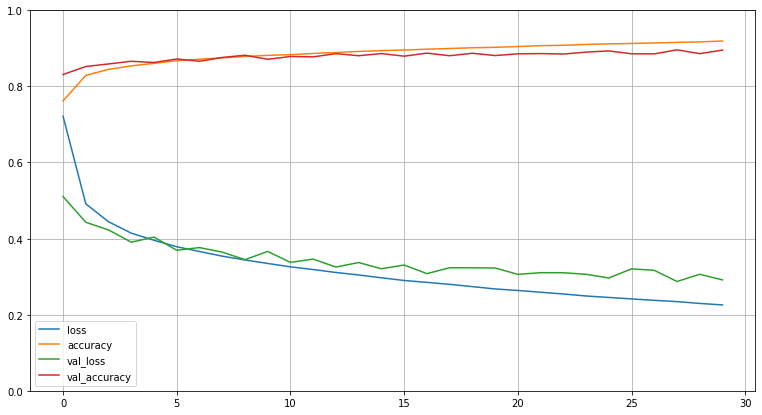

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(13,7))
plt.grid(True)
plt.gca().set_ylim(0,1) #setting the vertical range to [0->1]
plt.show()

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 653us/step - loss: 0.3327 - accuracy: 0.8824


[0.3327416181564331, 0.8823999762535095]

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [26]:
y_pred = model.predict_classes(X_new)
y_pred

/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [27]:
np.array(class_names)[y_pred]

array(['AnkleBoot', 'Pullover', 'Trouser'], dtype='<U11')

In [28]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

# Importing California Data

In [29]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [34]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

In [36]:
fetch = fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH)
fetch

In [37]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


In [38]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
